In [1]:
# 初期設定において、Google Colabで使用されているGPUやPython、PyTorchの情報を確認します

!nvidia-smi

Thu Mar 16 23:08:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [3]:
import sys
import torch


# -----------------------------
# 環境情報の確認
# -----------------------------
def print_program_info():
    print("Pythonのバージョン：", sys.version)
    print("---------")
    print("PyTorchのバージョン：", 
    torch.__version__)
    print("GPUの枚数：", torch.cuda.device_count())
    global device  # 変数deviceは以降もプログラム本体で使用するのでglobal変数にしています
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("device: ", device) 


# 【実行】確認
print_program_info()

Pythonのバージョン： 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
---------
PyTorchのバージョン： 1.13.1+cu116
GPUの枚数： 1
device:  cuda:0


---

初期状態では、

GPUはTesla T4 で、1枚。

Pythonのバージョンは3.9

PyTorchのバージョンは 1.13.1+cu116 です


!nvcc -Vでの結果より、cudaは11.8です

In [4]:
# PyTorch1系には存在しない関数・クラスを使用してみます

import torch

def foo(x, y):
    a = torch.sin(x)
    b = torch.cos(x)
    return a + b
opt_foo1 = torch.compile(foo)
print(opt_foo1(torch.randn(10, 10), torch.randn(10, 10)))


AttributeError: ignored

PyTorchのバージョンが1.13なので、予想通り、動作しませんでした



# PyTorch 2.0へ

解説

https://pytorch.org/blog/pytorch-2.0-release/

https://pytorch.org/

https://pytorch.org/get-started/pytorch-2.0/

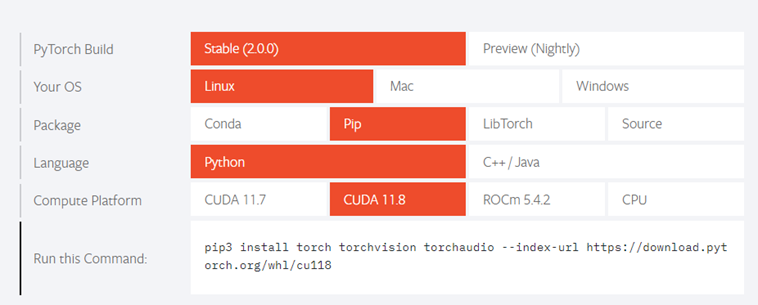

In [6]:
# pipのキャシュをクリアします
!pip3 cache purge


Files removed: 0


指定されたコマンドは

```pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118```

ですが、--force-reinstallをつけます（これがないとPyTorchの1.13がインストールされてしまいます。Colab環境では事前に1.13がインストールされているので、それを再度とってきてしまう）



In [10]:
!pip3 install torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 983.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [11]:
# 以前のpreview時のpytorch2.0のインストール方法（こちらでは開発版developがインストールされてしまう）
# !pip3 install numpy --pre torch[dynamo] --force-reinstall --extra-index-url https://download.pytorch.org/whl/nightly/cu118

以上でPyTorchのバージョンを上げることができました

**ここで一度ランタイムを再起動し、次は以下のセルから実行してください**


In [1]:
import sys
import torch


# -----------------------------
# 環境情報の確認
# -----------------------------
def print_program_info():
    print("Pythonのバージョン：", sys.version)
    print("---------")
    print("PyTorchのバージョン：", 
    torch.__version__)
    print("GPUの枚数：", torch.cuda.device_count())
    global device  # 変数deviceは以降もプログラム本体で使用するのでglobal変数にしています
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("device: ", device) 


# 【実行】確認
print_program_info()

Pythonのバージョン： 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
---------
PyTorchのバージョン： 2.0.0+cu118
GPUの枚数： 1
device:  cuda:0


PyTorchのバージョンが、2.0.0+cu118になりました

PyTorch2.0で多くの方がまず使用してみたいのは、torch.compileによるモデル圧縮を実施し、訓練を高速化する方法かもしれません。


https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/96ad88eb476f41a5403dcdade086afb8/torch_compile_tutorial.ipynb

In [2]:
import torch

def foo(x, y):
    a = torch.sin(x)
    b = torch.cos(x)
    return a + b
opt_foo1 = torch.compile(foo)
print(opt_foo1(torch.randn(10, 10), torch.randn(10, 10)))

tensor([[-0.0833, -0.3007,  1.1626, -0.7883, -0.1237,  1.2966, -0.1244,  0.6003,
          1.3789,  1.3350],
        [-0.1413,  1.4120, -0.2472,  0.8794, -0.1052,  1.1947,  0.0725,  1.3959,
         -1.2539, -0.6160],
        [ 0.1712,  1.3732,  1.0778,  1.3560,  0.0924, -0.3194,  0.6753,  1.2676,
          0.9236, -0.1707],
        [ 1.3889,  1.4142,  1.3729,  1.2027,  1.3938,  1.4045,  1.1090,  1.2603,
          1.2826,  1.2146],
        [ 1.2556,  0.9912,  0.2071,  0.0446,  1.4100,  1.3596,  1.3380,  1.3899,
          0.1810,  1.2164],
        [-1.1556,  0.9344,  1.1467,  0.1165, -0.4949,  1.4125, -0.2365,  0.0299,
         -0.1352, -0.5817],
        [-1.3188,  0.0799,  0.0537,  0.9777,  0.0620,  0.9841,  1.2468,  1.3848,
          0.5070,  0.8339],
        [ 1.3102, -0.9801,  0.1794,  0.6022,  0.9346, -0.0717,  0.7099,  1.3973,
          0.1072, -1.3769],
        [ 0.4601,  1.2877,  0.6924,  0.6932,  0.8779, -0.2710, -0.8476,  1.3871,
          0.6944,  1.4070],
        [ 1.3974,  

PyTorch1系では通らなかった、torch.compile()が通りました。

以下はモデルに対して、compileする方法です

In [3]:
class MyModule(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = torch.nn.Linear(100, 10)

    def forward(self, x):
        return torch.nn.functional.relu(self.lin(x))

mod = MyModule()
opt_mod = torch.compile(mod)
print(opt_mod(torch.randn(10, 100)))

tensor([[0.0000, 0.0000, 0.2456, 0.8915, 0.0000, 0.2584, 0.0000, 0.1341, 0.6217,
         0.4693],
        [0.0000, 0.0000, 0.1534, 0.2163, 0.0000, 0.0000, 0.4827, 0.2310, 1.5004,
         0.4599],
        [0.8601, 0.0000, 0.0000, 0.0000, 1.3399, 0.0000, 0.0000, 0.0000, 0.2627,
         0.0000],
        [0.0000, 0.1622, 0.9919, 0.0000, 1.0553, 0.0000, 0.0000, 0.0000, 0.1071,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4840, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.7314],
        [0.2096, 0.0000, 0.0000, 0.2712, 0.0000, 0.0000, 0.0000, 0.0000, 0.5114,
         0.0000],
        [1.2676, 0.0000, 1.6907, 0.1695, 1.9574, 0.0283, 0.0000, 0.2504, 0.0000,
         0.0000],
        [0.0000, 0.0000, 1.2184, 0.8391, 0.3813, 1.9803, 0.0000, 0.0000, 0.6754,
         0.0000],
        [0.0000, 0.4989, 0.0000, 0.0000, 0.0000, 0.2872, 0.5779, -0.0000, 0.4613,
         1.1647]], grad_fn=

PyTorch 2.0からのtorch.compile()が無事動作しました

# 以上